# Sentiment Analyse


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


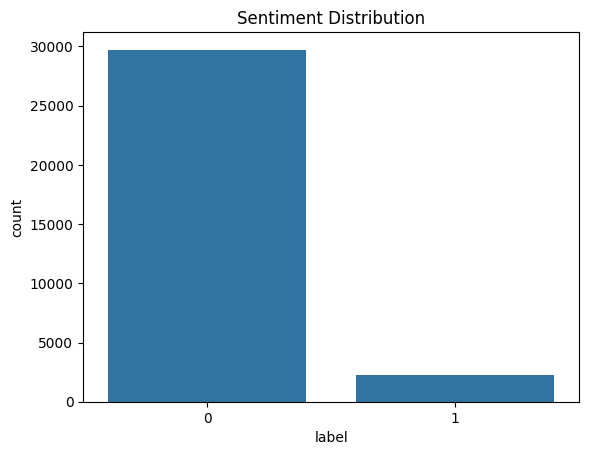

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.93      0.33      0.48       456

    accuracy                           0.95      6393
   macro avg       0.94      0.66      0.73      6393
weighted avg       0.95      0.95      0.94      6393

Accuracy Score: 0.9501016737056155


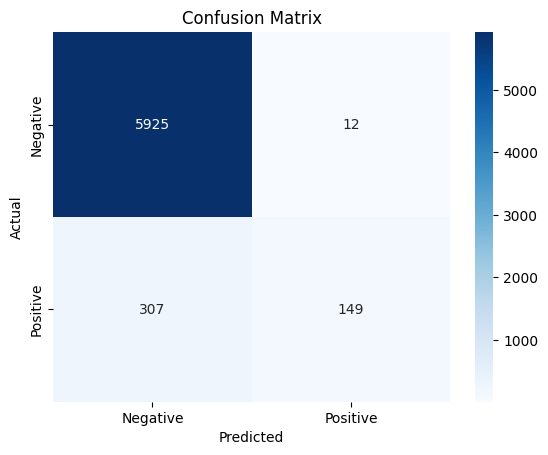

Examples of misclassified tweets:
                                                   tweet  label
24185  these kind of people need to be erased of eah'...      1
26110  i despise this  #antiamerican #muslimpos @user...      1
25113  history won't forget how barack obama was trea...      1
8241   uk 2016: where it fell to pop star @user to do...      1
21658  save the date! 1-4-2017 sourcenation! live wed...      1


In [3]:
# Sentiment Analysis Notebook

# Import Libraries
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Step 1: Load Dataset
# Replace this with your dataset file path
url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
data = pd.read_csv(url)
data = data[['tweet', 'label']]  # Assuming 'tweet' contains text and 'label' contains sentiment

# Step 2: Data Preprocessing
def preprocess_text(text):
    # Remove URLs, special characters, and numbers
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Tokenize and normalize
    tokens = text.lower().split()
    tokens = [t for t in tokens if t not in stopwords.words('english')]  # Remove stopwords

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Apply preprocessing
data['cleaned_tweet'] = data['tweet'].apply(preprocess_text)

# Step 3: Visualize Sentiment Distribution
sns.countplot(x='label', data=data)
plt.title("Sentiment Distribution")
plt.show()

# Step 4: Feature Extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_tweet']).toarray()
y = data['label']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model Implementation
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 7: Predictions and Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 8: Insights
# Example: Display some misclassified examples
misclassified = data.iloc[y_test.index][y_test != y_pred]
print("Examples of misclassified tweets:")
print(misclassified[['tweet', 'label']].head())
